In [1]:
#Pararmetric testing

import pandas as pd
from scipy.stats import ttest_1samp
dataset6=pd.read_excel("1. One Sample.xlsx")
dataset6.head()

,ids,Height
0,43783,72.35
1,20278,70.66
2,20389,70.68
3,22820,NaN
4,24559,67.43


In [2]:
dataset6.dropna()

,ids,Height
0,43783,72.35
1,20278,70.66
2,20389,70.68
4,24559,67.43
5,28980,68.45
...,...,...
429,36563,66.26
431,40697,68.50
432,34272,68.10
433,33628,69.27


In [3]:
d1 = dataset6.dropna()
y1=d1.Height
stat,p = ttest_1samp(y1,65)
print (stat,p)

11.498800238580099 1.087893570160242e-26


In [4]:
dataset7=pd.read_excel("2. Paired Sample.xlsx")
dataset7.head()

,ids,English,Math
0,43783,88.24,60.02
1,20278,89.45,70.19
2,20389,96.73,71.20
3,22820,74.06,55.89
4,24559,82.61,65.52


In [5]:
data1 = dataset7.dropna()
data1.head()

,ids,English,Math
0,43783,88.24,60.02
1,20278,89.45,70.19
2,20389,96.73,71.20
3,22820,74.06,55.89
4,24559,82.61,65.52


In [6]:
from scipy.stats import ttest_rel
b1=data1.English
b2=data1.Math
tat,p=ttest_rel(b1,b2)
stat,p=ttest_rel(b1,b2)
print (tat,p)
print (stat,p)

36.312568981719856 3.0710987192210606e-128
36.312568981719856 3.0710987192210606e-128


In [7]:
from scipy.stats import ttest_ind
dataset8=pd.read_excel("3. Independent Sample2.xlsx")
dataset8

,ids,NonAthlete_Timing,Athlete_Timing
0,1,0.004872,0.004413
1,2,0.004872,0.005146
2,3,0.008851,0.004023
3,4,0.006508,0.003941
4,5,0.006314,0.004764


In [8]:
#H0: There is no difference in means between NonAthlete Timing and AthleteTiming Mu1 = Mu2
#H1: There is significant difference between NonAthlete Timing and AthleteTiming Mu1 =! Mu2
#Significance level: 0.05

z1 = dataset8.NonAthlete_Timing
z2 = dataset8.Athlete_Timing
stat,p = ttest_ind(z1,z2)
print (stat,p)

"""Since the p-value is less than the significance level, we reject the null hypothesis. Conclude that 
there is significant difference between the means of NonAthelete timing and AthleteTiming"""

2.3921384196948705 0.0437097152615275


'Since the p-value is less than the significance level, we reject the null hypothesis. Conclude that \nthere is significant difference between the means of NonAthelete timing and AthleteTiming'

In [9]:
from scipy.stats import f_oneway
dataset = pd.read_excel ("ANOVA.xlsx",sheet_name=1)
dataset.head()
a1 = dataset['Low Promotion Products']
a2 = dataset['Medium Promotion Products']
a3 = dataset['High Promotion Products']
stat, p =f_oneway(a1,a2,a3)
print (dataset.head())
print (stat,p)

   Store Number  Low Promotion Products  Medium Promotion Products  \
0             1                      10                          8   
1             2                      23                          5   
2             3                      12                         23   
3             4                      16                         21   
4             5                      12                          4   

   High Promotion Products  
0                        6  
1                        5  
2                       10  
3                       13  
4                       23  
0.4757456290709635 0.6247293536948061


<AxesSubplot:>

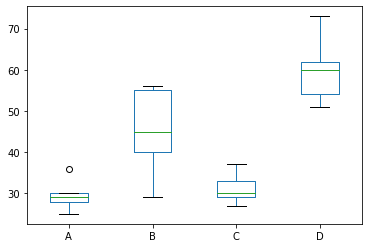

In [10]:
d=pd.read_csv("onewayanova.csv")
d.head()
d.boxplot(column=['A','B','C','D'],grid=False)

In [11]:
import scipy.stats as stats
#stats f-oneway function takes the groups as input and returns the F and P-value
fvalue,pvalue = stats.f_oneway(d["A"],d["B"],d["C"],d["D"])
print (fvalue,pvalue)

17.492810457516338 2.639241146210922e-05


In [12]:
d_melt = pd.melt(d.reset_index(), id_vars=['A','B','C','D'])
d_melt
print (d.head())
print (d_melt.head())

    A   B   C   D
0  25  45  30  54
1  30  55  29  60
2  28  29  33  51
3  36  56  37  62
4  29  40  27  73
    A   B   C   D variable  value
0  25  45  30  54    index      0
1  30  55  29  60    index      1
2  28  29  33  51    index      2
3  36  56  37  62    index      3
4  29  40  27  73    index      4


In [13]:
d_melt = pd.melt(d.reset_index(), id_vars=['index'],value_vars = ['A','B','C','D'])
d_melt
print (d.head())
print (d_melt)

    A   B   C   D
0  25  45  30  54
1  30  55  29  60
2  28  29  33  51
3  36  56  37  62
4  29  40  27  73
    index variable  value
0       0        A     25
1       1        A     30
2       2        A     28
3       3        A     36
4       4        A     29
5       0        B     45
6       1        B     55
7       2        B     29
8       3        B     56
9       4        B     40
10      0        C     30
11      1        C     29
12      2        C     33
13      3        C     37
14      4        C     27
15      0        D     54
16      1        D     60
17      2        D     51
18      3        D     62
19      4        D     73


In [14]:
#replace column names
d_melt.columns = ['index','treatments','value']
d_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [18]:
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table


,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [20]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'],  groups=d_melt['treatments'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     15.4 0.0251   1.6929 29.1071   True
     A      C      1.6    0.9 -12.1071 15.3071  False
     A      D     30.4  0.001  16.6929 44.1071   True
     B      C    -13.8 0.0482 -27.5071 -0.0929   True
     B      D     15.0 0.0296   1.2929 28.7071   True
     C      D     28.8  0.001  15.0929 42.5071   True
-----------------------------------------------------


In [21]:
"""Above results from Tukey HSD suggests that except A-C, all  
other pairwise comparisons for treatments rejects null  
hypothesis and indicates statistical significant differences."""

'Above results from Tukey HSD suggests that except A-C, all  \nother pairwise comparisons for treatments rejects null  \nhypothesis and indicates statistical significant differences.'

In [22]:
#Test ANOVA assumptions

"""The Shapiro-Wilk test can be used to check the normal  
distribution of residuals . 
Null hypothesis: data is drawn from normal distribution."""
# load packages
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9685019850730896 0.7229772806167603


In [23]:
"""As the P-value is non significant, we fail to reject null  
hypothesis and conclude that data is drawn from normal  
distribution."""


'As the P-value is non significant, we fail to reject null  \nhypothesis and conclude that data is drawn from normal  \ndistribution.'

In [24]:
"""#As the data is drawn from normal distribution, use  
Bartlett’s test to check the Homogeneity of variances. 
Null hypothesis: samples from populations have equal variances."""
# load packages
import scipy.stats as stats
w, pvalue = stats.bartlett(d['A'], d['B'], d['C'], d['D'])
print(w, pvalue)

5.687843565012841 0.1278253399753447


In [25]:
"""As the P-value (0.12) is non significant, we fail to reject  
null hypothesis and conclude that treatments have equal  
variances."""
"""#Levene test can be used to check the Homogeneity of  
variances when the data is not drawn from normal  
distribution."""


'As the P-value (0.12) is non significant, we fail to reject  \nnull hypothesis and conclude that treatments have equal  \nvariances.'

In [26]:
#two way ANOVA
# load packages
import pandas as pd
import seaborn as sns
# load data file
d = pd.read_csv("twowayanova.csv")

d.head()

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95


In [27]:
# reshape the dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])

# replace column names
d_melt.columns = ['Genotype', 'years', 'value']

d_melt

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94
5,B,1_year,4.02
6,C,1_year,3.99
7,C,1_year,3.30
8,C,1_year,4.41
9,D,1_year,3.75


<AxesSubplot:xlabel='Genotype', ylabel='value'>

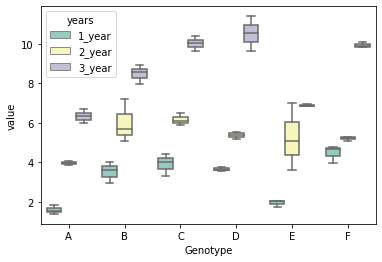

In [28]:
# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the
# differences between different groups

sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set3")

In [29]:
# load packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(Genotype),58.567787,5.0,32.747723,1.932388e-12
C(years),278.874515,2.0,389.826298,4.039718e-25
C(Genotype):C(years),17.132707,10.0,4.789810,2.224877e-04
Residual,12.876867,36.0,NaN,NaN


In [30]:
"""Interpretation: The P-value obtained from ANOVA analysis for genotype, years, and interaction are statistically significant (P<0.05). We conclude that type of genotype significantly affects the yield outcome, time (years) significantly affects the yield outcome, and interaction of both genotype and time (years) significantly affects the yield outcome.
Now, we know that genotype and time (years) differences are statistically significant, but ANOVA does not tell which genotype and time (years) are significantly different from each other. To know the pairs of significant different genotype and time (years), perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey HSD test.
Similar to one-way ANOVA, you can use Levene and Shapiro-Wilk test to validate the assumptions for homogeneity of variances and normal distribution of residuals."""


'Interpretation: The P-value obtained from ANOVA analysis for genotype, years, and interaction are statistically significant (P<0.05). We conclude that type of genotype significantly affects the yield outcome, time (years) significantly affects the yield outcome, and interaction of both genotype and time (years) significantly affects the yield outcome.\nNow, we know that genotype and time (years) differences are statistically significant, but ANOVA does not tell which genotype and time (years) are significantly different from each other. To know the pairs of significant different genotype and time (years), perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey HSD test.\nSimilar to one-way ANOVA, you can use Levene and Shapiro-Wilk test to validate the assumptions for homogeneity of variances and normal distribution of residuals.'

In [31]:
# load packages
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.8980535268783569 0.00024307428975589573


In [32]:
# load packages
import scipy.stats as stats
w, pvalue = stats.bartlett(d['1_year'], d['2_year'], d['3_year'])
print(w, pvalue)


5.182194412491613 0.07493777276914446


In [34]:
#One sample t_test

#Importing libraries

import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_1samp

#Loading data
data = pd.read_csv("onesample.csv")
data = data['Insect Length']
#Let's conduct a one sample t-test to check if the mean of the sample insects is similar to the mean of earlier insects.mean of earlier insects is. 6.09

#We have the degree of freedom that is 28 and taking significance level to be 0.05, the t-critical value comes out to be 2.048

t_statistic, _ = ttest_1samp(data, 6.09)

print(t_statistic)


5.466112820736585


In [38]:
#Paired t_test

#Importing libraries
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_rel
#Loading data

data = pd.read_excel("Data for paired t test.xlsx")

data.head()


,Errors using typewriter,Errors using a computer
0,8,8
1,13,8
2,10,4
3,7,9
4,13,10


In [40]:
t_statistic, _ = stats.ttest_rel(data['Errors using typewriter'],data['Errors using a computer'])
t_statistic


3.6842075835369266